# Risk Analyst - Data Analysis

#### 1. Please put together some summary statistics/visualizations on the approved group and the booked group.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp
import ast

#### Load Data

In [2]:
file = pd.read_csv("C:/Users/GZW/Desktop/WORK/CommonBond/part_1/prompt_data.csv")
file['booked'] = file['booked'].astype(str)

# Data Pre-process
file['age'] = file['age'].round()
file['booked'] = file['booked'].astype(str)

Approved = file.loc[file['status'] == 'APPROVED', ]
Booked = file.loc[file['booked'] == '1.0', ]

print("Rows in the Approved Group: ", len(Approved))
print("Rows in the Booked Group: ", len(Booked))

Rows in the Approved Group:  2988
Rows in the Booked Group:  354


#### Descriptive Statistics Summary

In [3]:
#Approved Group summary
Approved.describe(include = 'all')

,borrow_amount,bor_income,free_cash_flow,fico,coverage,leverage,age,is_undergrad,decline_reasons,status,booked
count,2988.000000,2.988000e+03,2988.000000,2988.000000,2988.000000,2988.000000,2979.000000,2987,2988,2988,2988
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,[''],APPROVED,0.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1836,2988,2988,2634
mean,78330.243827,1.093390e+05,4328.021764,760.848095,2.956628,1.545007,33.148708,NaN,NaN,NaN,NaN
std,77411.580015,9.063231e+04,4412.290844,44.866982,3.519519,1.059007,8.901617,NaN,NaN,NaN,NaN
min,-9874.465172,1.536933e+04,630.817940,-4.124388,0.638931,-0.167503,20.000000,NaN,NaN,NaN,NaN
25%,29245.143239,6.208721e+04,2336.588614,733.763214,1.977820,0.727566,27.000000,NaN,NaN,NaN,NaN
50%,53161.001457,8.691908e+04,3316.182056,762.772442,2.581349,1.277850,31.000000,NaN,NaN,NaN,NaN
75%,98640.505363,1.266152e+05,4998.785667,791.528401,3.338167,2.186386,36.000000,NaN,NaN,NaN,NaN


In [4]:
#Booked Group summary
Booked.describe(include = 'all')

,borrow_amount,bor_income,free_cash_flow,fico,coverage,leverage,age,is_undergrad,decline_reasons,status,booked
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354,354,354,354
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,[''],APPROVED,1.0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197,354,354,354
mean,91908.809086,140637.299195,5726.935155,770.911577,3.316668,1.554197,34.045198,NaN,NaN,NaN,NaN
std,93445.412294,92386.134164,4054.208728,40.588431,1.960230,1.058141,8.689689,NaN,NaN,NaN,NaN
min,-628.637582,25661.287311,754.383331,663.688452,0.680282,0.022878,22.000000,NaN,NaN,NaN,NaN
25%,30307.929469,77813.778198,3191.267226,746.498568,2.211935,0.766722,29.000000,NaN,NaN,NaN,NaN
50%,56608.428235,113829.749498,4680.279951,779.049995,2.858966,1.325794,32.000000,NaN,NaN,NaN,NaN
75%,116392.676769,160686.812099,6698.770504,801.562560,3.781702,2.111561,36.000000,NaN,NaN,NaN,NaN


#### Relationship between two groups

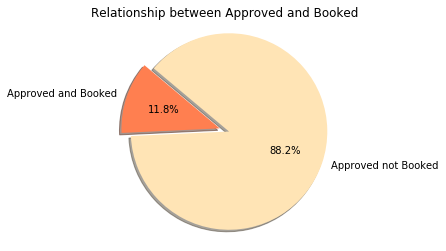

The Booked Group is a subset of Approved Group


In [5]:
labels = 'Approved and Booked', 'Approved not Booked'
sizes = [354, 2988-354]
colors = ['coral', 'moccasin']
explode = (0.1, 0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('Relationship between Approved and Booked')
plt.show()

print('The Booked Group is a subset of Approved Group')

#### Missing Values

In [6]:
NAs = pd.DataFrame(Approved.isnull().sum(), columns = ['NA in Approved Group'])
NAs['NA in Booked Group'] = Booked.isnull().sum()
NAs

,NA in Approved Group,NA in Booked Group
borrow_amount,0,0
bor_income,0,0
free_cash_flow,0,0
fico,0,0
coverage,0,0
leverage,0,0
age,9,0
is_undergrad,1,0
decline_reasons,0,0
status,0,0


#### Analysis of Categorical Variable

In [7]:
# Approved_age = Approved['age'].groupby(pd.cut(Approved['age'], bins=bins)).size().to_frame()
# Approved_age = Approved_age.apply(lambda x: x/x.sum())
# Booked_age = Booked['age'].groupby(pd.cut(Booked['age'], bins=bins)).size().to_frame()
# Booked_age = Booked_age.apply(lambda x: x/x.sum())
# print(Approved_age, Booked_age)

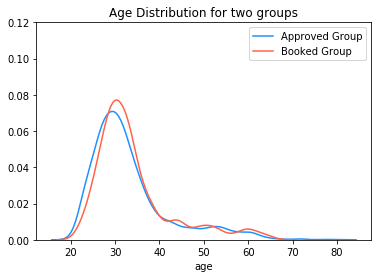

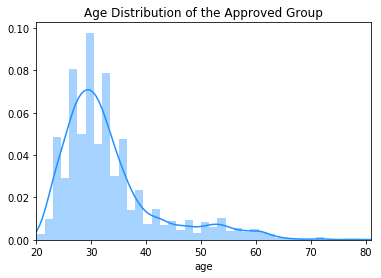

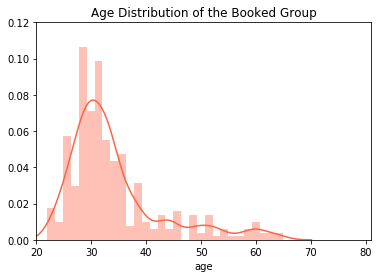

             age_x       age_y
count  2979.000000  354.000000
mean     33.148708   34.045198
std       8.901617    8.689689
min      20.000000   22.000000
25%      27.000000   29.000000
50%      31.000000   32.000000
75%      36.000000   36.000000
max      80.000000   65.000000


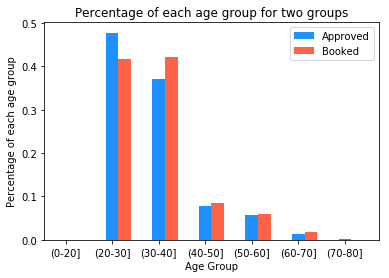

KS test result is:  Ks_2sampResult(statistic=0.091847616454518666, pvalue=0.0088893995536995039)
The p-value returned by KS test is 0.0089, less than significant level 0.05. We can reject the null hypothesis that the two samples were drawn from the same distribution


In [8]:
# Age ###

#Multiple line charts
sns.distplot(Approved['age'].dropna(), label = 'Approved Group', hist = False, color = 'dodgerblue')
sns.distplot(Booked['age'].dropna(), label = 'Booked Group', hist = False, color = 'tomato')
plt.title('Age Distribution for two groups')
plt.ylim(0, 0.12)
plt.legend(loc='upper right')
plt.show()

#Approved Group
sns.distplot(Approved['age'].dropna(), color = 'dodgerblue', bins = 40)
plt.title('Age Distribution of the Approved Group')
plt.xlim(min(Approved['age'].min(), Booked['age'].min()), max(Approved['age'].max(), Booked['age'].max())+1)
plt.show()

#Booked Group
sns.distplot(Booked['age'].dropna(), color = 'tomato', bins = 30)
plt.title('Age Distribution of the Booked Group')
plt.ylim(0, 0.12)
plt.xlim(min(Approved['age'].min(), Booked['age'].min()), max(Approved['age'].max(), Booked['age'].max())+1)
plt.show()

#Summary Statistics
print(pd.merge(pd.DataFrame(Approved['age']).describe(), pd.DataFrame(Booked['age']).describe(), left_index=True, right_index=True))

#Bar plot
bins = [0, 20, 30, 40, 50, 60, 70, 80]
Approved_age = Approved['age'].groupby(pd.cut(Approved['age'], bins=bins)).size().to_frame()
Approved_age = Approved_age.apply(lambda x: x/x.sum())
Booked_age = Booked['age'].groupby(pd.cut(Booked['age'], bins=bins)).size().to_frame()
Booked_age = Booked_age.apply(lambda x: x/x.sum())

N = 7
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

Approved_age = [i[0] for i in Approved_age.values.tolist()]
Booked_age = [i[0] for i in Booked_age.values.tolist()]

plt.bar(ind, Approved_age, width, color='dodgerblue', label = "Approved")
plt.bar(ind+width, Booked_age, width, color='tomato', label = "Booked")
plt.title('Percentage of each age group for two groups')
plt.xticks(ind, ('(0-20]', '(20-30]', '(30-40]', '(40-50]', '(50-60]', '(60-70]', '(70-80]'))
plt.legend(loc='upper right')
plt.xlabel('Age Group')
plt.ylabel('Percentage of each age group')
plt.show()

#Kolmogorov-Smirnov Test
print('KS test result is: ', ks_2samp(Approved['age'], Booked['age']))

print('The p-value returned by KS test is 0.0089, less than significant level 0.05. We can reject the null hypothesis that the two samples were drawn from the same distribution')

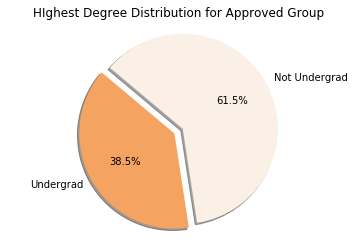

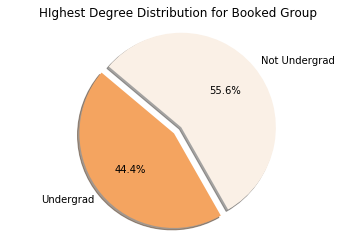

44.4% of the booked group are undergrad, higher than that of approved group.


In [9]:
### Highest Degree is Undergrad or not ###

#Approved Group
labels = 'Undergrad', 'Not Undergrad'
sizes = [2987-1836, 1836]
colors = ['sandybrown', 'linen']
explode = (0.1, 0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('HIghest Degree Distribution for Approved Group')
plt.show()

#Booked Group
labels = 'Undergrad', 'Not Undergrad'
sizes = [354-197, 197]
colors = ['sandybrown', 'linen']
explode = (0.1, 0)

plt.pie(sizes, explode = explode, labels = labels, colors = colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.title('HIghest Degree Distribution for Booked Group')
plt.show()

print('44.4% of the booked group are undergrad, higher than that of approved group.')

#### Detect Outliers

In [10]:
#Approved Group
Approved_Q1 = Approved[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']].quantile(0.25)
Approved_Q3 = Approved[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']].quantile(0.75)
Approved_IQR = Approved_Q3 - Approved_Q1

Num_Ouliers_A = (Approved[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']] < (Approved_Q1 - 1.5 * Approved_IQR)) |(Approved[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']] > (Approved_Q3 + 1.5 * Approved_IQR))
print('\nNumber of outliers in the Approved Group: ')
print(Num_Ouliers_A.apply(lambda x: x.sum()))

# Booked Group
Booked_Q1 = Booked[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']].quantile(0.25)
Booked_Q3 = Booked[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']].quantile(0.75)
Booked_IQR = Booked_Q3 - Booked_Q1

Num_Ouliers_B = (Booked[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']] < (Booked_Q1 - 1.5 * Booked_IQR)) |(Booked[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']] > (Booked_Q3 + 1.5 * Booked_IQR))
print('\nNumber of outliers in the Booked Group: ')
print(Num_Ouliers_B.apply(lambda x: x.sum()))

#delete rows with outliers
Approved = Approved[~((Approved[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']] < (Approved_Q1 - 1.5 * Approved_IQR)) |(Approved[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']] > (Approved_Q3 + 1.5 * Approved_IQR))).any(axis=1)]
print(Approved.shape)
Booked = Booked[~((Booked[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']] < (Booked_Q1 - 1.5 * Booked_IQR)) |(Booked[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']] > (Booked_Q3 + 1.5 * Booked_IQR))).any(axis=1)]
print(Booked.shape)


Number of outliers in the Approved Group: 
borrow_amount     215
bor_income        218
free_cash_flow    225
fico                2
coverage          146
leverage           17
dtype: int64

Number of outliers in the Booked Group: 
borrow_amount     28
bor_income        33
free_cash_flow    29
fico               1
coverage          24
leverage           7
dtype: int64
(2502, 11)
(273, 11)


#### Analysis of Continuous Variable

                borrow_amount  bor_income  free_cash_flow      fico  coverage  \
borrow_amount        1.000000    0.381499        0.208411  0.049751 -0.183423   
bor_income           0.381499    1.000000        0.797861  0.163796  0.169689   
free_cash_flow       0.208411    0.797861        1.000000  0.185304  0.469099   
fico                 0.049751    0.163796        0.185304  1.000000  0.092178   
coverage            -0.183423    0.169689        0.469099  0.092178  1.000000   
leverage             0.161634    0.064034       -0.143495  0.046901 -0.373693   

                leverage  
borrow_amount   0.161634  
bor_income      0.064034  
free_cash_flow -0.143495  
fico            0.046901  
coverage       -0.373693  
leverage        1.000000  


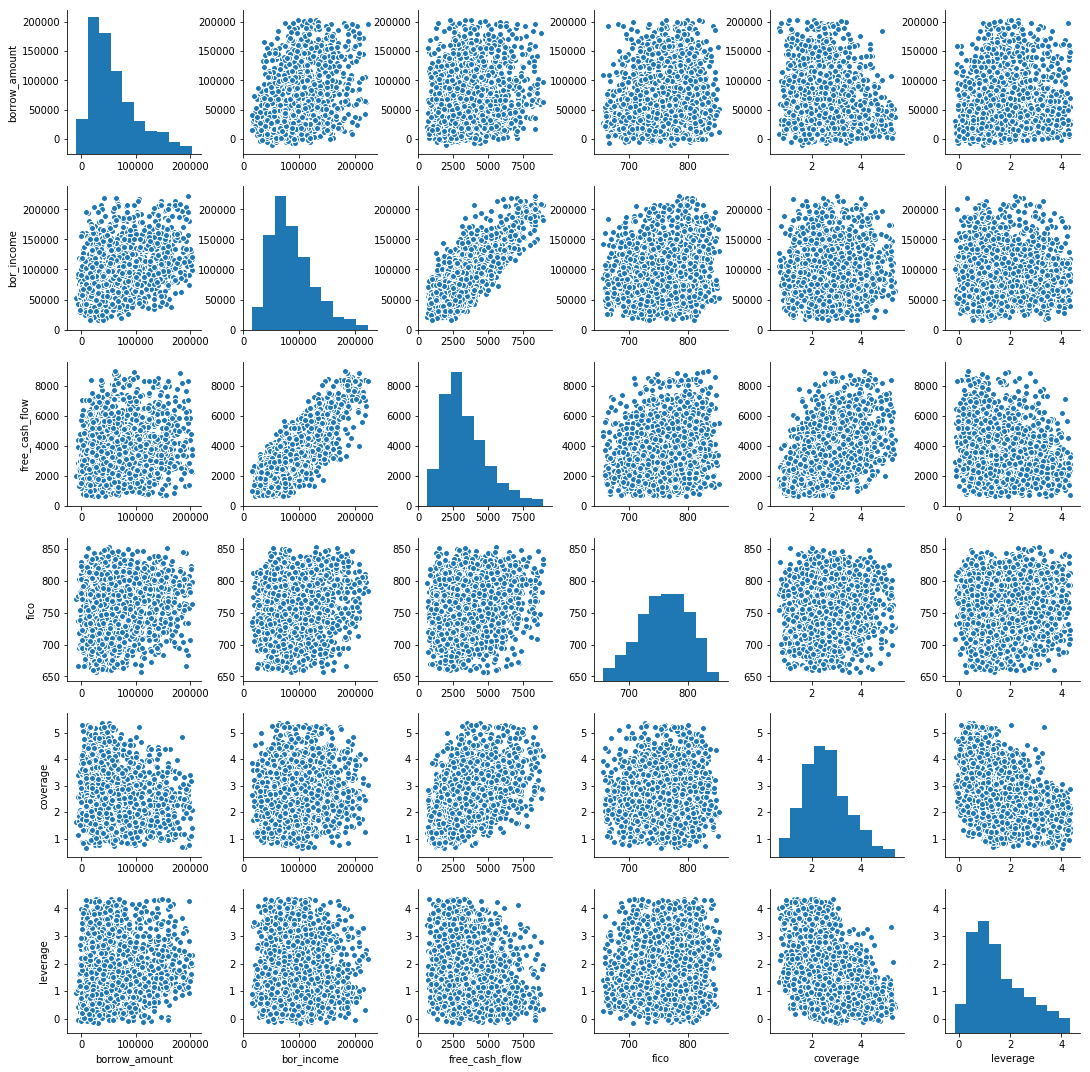

                borrow_amount  bor_income  free_cash_flow      fico  coverage  \
borrow_amount        1.000000    0.501494        0.388042  0.031070 -0.117213   
bor_income           0.501494    1.000000        0.857010  0.118781  0.066781   
free_cash_flow       0.388042    0.857010        1.000000  0.155702  0.355233   
fico                 0.031070    0.118781        0.155702  1.000000  0.027152   
coverage            -0.117213    0.066781        0.355233  0.027152  1.000000   
leverage             0.009783   -0.039355       -0.172078  0.069880 -0.368872   

                leverage  
borrow_amount   0.009783  
bor_income     -0.039355  
free_cash_flow -0.172078  
fico            0.069880  
coverage       -0.368872  
leverage        1.000000  


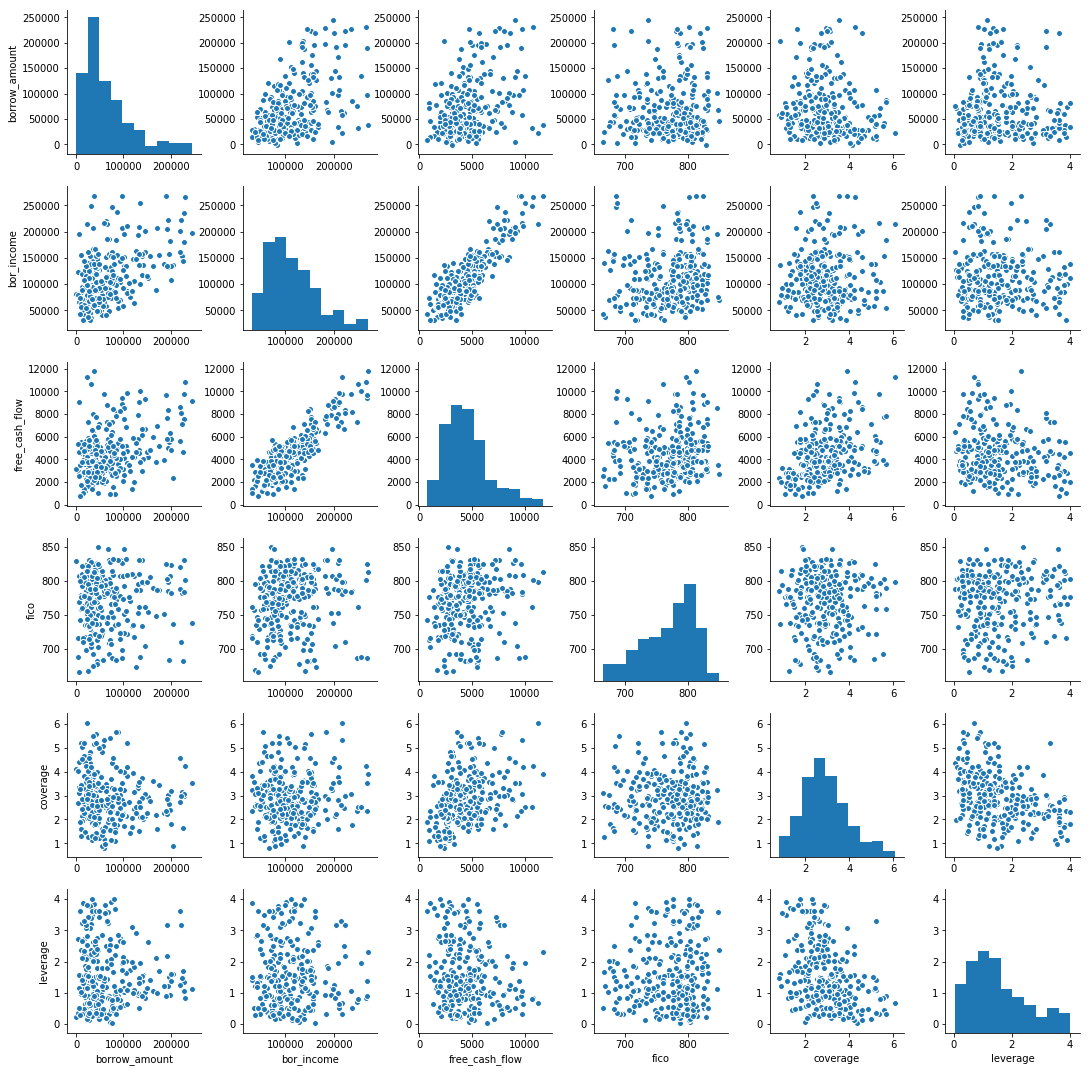

The scatter plot shows a positive relationship between free_crash_flow and bor_income.


In [11]:
#Correlation of Approved Group 
print(Approved[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']].corr())
sns.pairplot(Approved[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']])
plt.show()

#Correlation of Booked Group 
print(Booked[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']].corr())
sns.pairplot(Booked[['borrow_amount', 'bor_income', 'free_cash_flow', 'fico', 'coverage', 'leverage']])
plt.show()

print('The scatter plot shows a positive relationship between free_crash_flow and bor_income.')

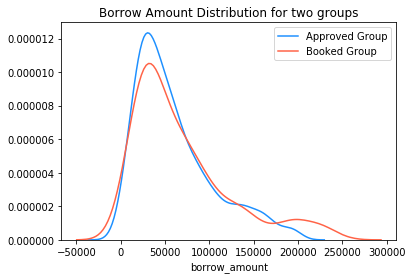

       borrow_amount_x  borrow_amount_y
count      2502.000000       273.000000
mean      60242.912563     68223.791679
std       44312.945071     54894.269151
min       -9874.465172      -628.637582
25%       27314.996476     27809.126694
50%       47911.228567     48971.369135
75%       82035.028988     91691.114985
max      202731.111211    244687.826163


In [12]:
### Borrow Amount###

#Multiple line charts
sns.distplot(Approved['borrow_amount'].dropna(), label = 'Approved Group', hist = False, color = 'dodgerblue')
sns.distplot(Booked['borrow_amount'].dropna(), label = 'Booked Group', hist = False, color = 'tomato')
plt.title('Borrow Amount Distribution for two groups')
plt.legend(loc='upper right')
plt.show()

print(pd.merge(pd.DataFrame(Approved['borrow_amount']).describe(), pd.DataFrame(Booked['borrow_amount']).describe(), left_index=True, right_index=True))

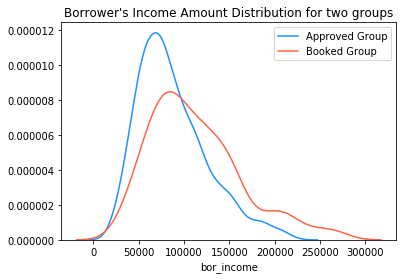

        bor_income_x   bor_income_y
count    2502.000000     273.000000
mean    87596.221046  112896.522102
std     38764.223373   50799.725029
min     15369.331627   30632.245004
25%     59111.141962   75294.851209
50%     79796.778040  103176.466148
75%    108910.239761  139062.842323
max    222495.822508  268443.128857


In [13]:
### Borrower Income###

#Multiple line charts
sns.distplot(Approved['bor_income'].dropna(), label = 'Approved Group', hist = False, color = 'dodgerblue')
sns.distplot(Booked['bor_income'].dropna(), label = 'Booked Group', hist = False, color = 'tomato')
plt.title('Borrower\'s Income Amount Distribution for two groups')
plt.legend(loc='upper right')
plt.show()

print(pd.merge(pd.DataFrame(Approved['bor_income']).describe(), pd.DataFrame(Booked['bor_income']).describe(), left_index=True, right_index=True))

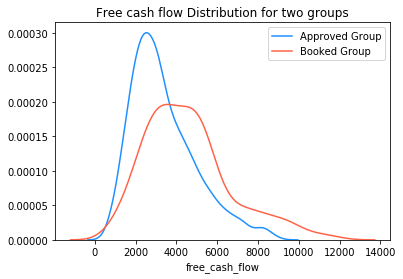

       free_cash_flow_x  free_cash_flow_y
count       2502.000000        273.000000
mean        3378.894613       4551.552328
std         1598.386084       2123.436330
min          652.331498        754.383331
25%         2216.993184       2983.285057
50%         3029.571273       4253.885129
75%         4247.968189       5532.167304
max         8953.598509      11769.565062


In [14]:
### Free cash flow###

#Multiple line charts
sns.distplot(Approved['free_cash_flow'].dropna(), label = 'Approved Group', hist = False, color = 'dodgerblue')
sns.distplot(Booked['free_cash_flow'].dropna(), label = 'Booked Group', hist = False, color = 'tomato')
plt.title('Free cash flow Distribution for two groups')
plt.legend(loc='upper right')
plt.show()

print(pd.merge(pd.DataFrame(Approved['free_cash_flow']).describe(), pd.DataFrame(Booked['free_cash_flow']).describe(), left_index=True, right_index=True))

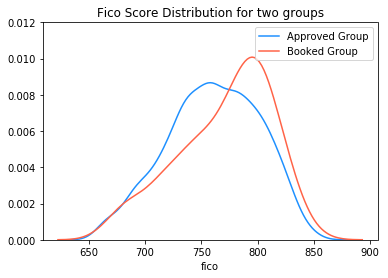

            fico_x      fico_y
count  2502.000000  273.000000
mean    760.443495  770.613992
std      40.860294   41.785420
min     656.970819  665.921972
25%     732.669049  741.856976
50%     761.663239  779.110023
75%     792.148667  802.833347
max     852.959329  849.672810


In [15]:
###Fico###

#Multiple line charts
sns.distplot(Approved['fico'].dropna(), label = 'Approved Group', hist = False, color = 'dodgerblue')
sns.distplot(Booked['fico'].dropna(), label = 'Booked Group', hist = False, color = 'tomato')
plt.title('Fico Score Distribution for two groups')
plt.legend(loc='upper right')
plt.ylim(0, 0.012)
plt.show()

print(pd.merge(pd.DataFrame(Approved['fico']).describe(), pd.DataFrame(Booked['fico']).describe(), left_index=True, right_index=True))

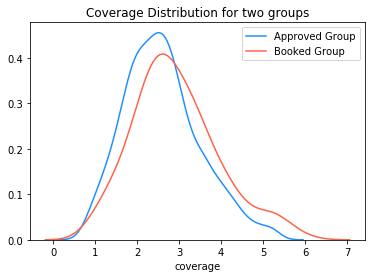

        coverage_x  coverage_y
count  2502.000000  273.000000
mean      2.590499    2.919165
std       0.903781    1.025698
min       0.657478    0.813914
25%       1.945026    2.208762
50%       2.504006    2.782374
75%       3.118188    3.520286
max       5.373440    6.056467


In [16]:
###Coverage###

#Multiple line charts
sns.distplot(Approved['coverage'].dropna(), label = 'Approved Group', hist = False, color = 'dodgerblue')
sns.distplot(Booked['coverage'].dropna(), label = 'Booked Group', hist = False, color = 'tomato')
plt.title('Coverage Distribution for two groups')
plt.legend(loc='upper right')
plt.show()

print(pd.merge(pd.DataFrame(Approved['coverage']).describe(), pd.DataFrame(Booked['coverage']).describe(), left_index=True, right_index=True))

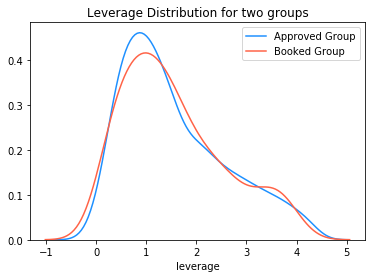

        leverage_x  leverage_y
count  2502.000000  273.000000
mean      1.557008    1.547743
std       1.041218    1.014215
min      -0.167503    0.022878
25%       0.750011    0.798040
50%       1.285884    1.363074
75%       2.215665    2.157129
max       4.360531    4.019719


In [17]:
###Leverage###

#Multiple line charts
sns.distplot(Approved['leverage'].dropna(), label = 'Approved Group', hist = False, color = 'dodgerblue')
sns.distplot(Booked['leverage'].dropna(), label = 'Booked Group', hist = False, color = 'tomato')
plt.title('Leverage Distribution for two groups')
plt.legend(loc='upper right')
plt.show()

print(pd.merge(pd.DataFrame(Approved['leverage']).describe(), pd.DataFrame(Booked['leverage']).describe(), left_index=True, right_index=True))

#### 2. Please put together some summary statistics/visualizations on the declined group, including a breakdown of the decline reasons.

In [18]:
Declined = file.loc[file['status'] == 'DECLINED', ]

#### Missing Values

In [19]:
NAs = Declined.isnull().sum()
NAs

borrow_amount       0
bor_income          0
free_cash_flow      0
fico                0
coverage            0
leverage            0
age                59
is_undergrad        0
decline_reasons     0
status              0
booked              0
dtype: int64

#### Decline Reasons

In [20]:
reason = []
for i in Declined['decline_reasons'].unique():
    a = i.replace(']', '').replace('[', '').replace('\'', '').split(', ')
    for b in a:
        if b not in reason:
            reason.append(b)
reason = sorted(reason)
print(reason)
Declined = Declined.reindex(columns = np.append(Declined.columns.values, reason))

['CHARGEOFFS_EXCEED_MAX', 'CREDIT_REPORT_ERROR', 'CREDIT_REPORT_ERROR_COSIGNER', 'DELINQUENCIES_EXCEED_MAX', 'FROZEN_BUREAU', 'MAX_LEVERAGE', 'MAX_LEVERAGE_COSIGNER', 'MIN_CB_RATIO', 'MIN_CB_RATIO_COSIGNER', 'MIN_COVERAGE', 'MIN_COVERAGE_COSIGNER', 'MIN_CREDIT_HISTORY', 'MIN_FCF', 'MIN_FCF_COSIGNER', 'MIN_FICO', 'MIN_FICO_COSIGNER', 'PRIOR_STUDENT_LOAN_DEFAULT', 'RECENT_BANKRUPTCY']


#### Most declined reasons

In [21]:
#Create columns for each reason
for i in range(0, len(Declined)):
    #print(i)
    reasonlist = ast.literal_eval(Declined['decline_reasons'].iloc[i])
    for m in reasonlist:
        Declined[m].iloc[i] = 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "right center". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


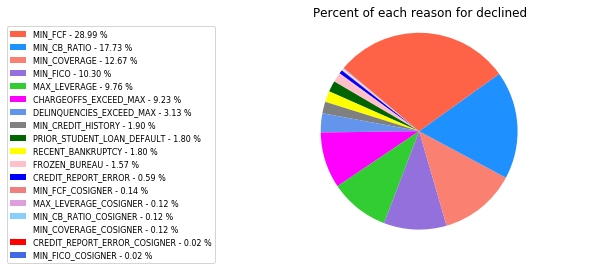

The pie chart shows that MIN_FCF, MIN_CB_RATIO, MIN_COVERAGE, MIN_FICO, MAX_LEVERAGE are the mostly used reasons for the declined group.


In [22]:
reason_sum = Declined[reason].apply(lambda x: x.sum()).to_frame()
reason_sum['reason'] = reason_sum.index
reason_sum.columns.values.tolist()
reason_sum.sort_values(by = [0, 'reason'], inplace = True)
reason_sum

x = np.char.array(reason_sum['reason'],unicode=True)
y = np.array(reason_sum[0])
colors = ['red','royalblue','plum','lightskyblue','white','lightcoral','blue','pink', 'darkgreen',
          'yellow','grey','cornflowerblue','magenta','limegreen', 'mediumpurple', 'salmon', 'dodgerblue', 'tomato']
percent = 100.*y/y.sum()

patches, texts = plt.pie(y, startangle=140, colors = colors)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='right center', bbox_to_anchor=(-0.1, 1.), fontsize=8)
plt.axis('equal')
plt.title('Percent of each reason for declined')
plt.show()

print('The pie chart shows that MIN_FCF, MIN_CB_RATIO, MIN_COVERAGE, MIN_FICO, MAX_LEVERAGE are the mostly used reasons for the declined group.')

In [23]:
print('1) Average free cash flow for the declined group is:', Declined['free_cash_flow'].mean(), ', lower than the approved group, which is ', Approved['free_cash_flow'].mean())
print('2) Average coverage for the declined group is:', Declined['coverage'].mean(), ', lower than the approved group, which is ', Approved['coverage'].mean())
print('3) Average fico for the declined group is:', Declined['fico'].mean(), ', lower than the approved group, which is ', Approved['fico'].mean())
print('4) Average leverage for the declined group is:', Declined['leverage'].mean(), ', higher than the approved group, which is ', Approved['leverage'].mean())

1) Average free cash flow for the declined group is: 1164.0850051990283 , lower than the approved group, which is  3378.8946126733053
2) Average coverage for the declined group is: 1.7863238008583469 , lower than the approved group, which is  2.5904989913625664
3) Average fico for the declined group is: 658.9042484720165 , lower than the approved group, which is  760.4434953814275
4) Average leverage for the declined group is: 131.8453557151608 , higher than the approved group, which is  1.5570078325003704


#### Num of declined reason per borrower

In [24]:
Declined['Num_decline_reason'] = Declined.iloc[:, 11:].sum(axis = 1)

In [25]:
# Declined.drop(['Num_decline_reason'], axis = 1, inplace = True)

In [26]:
print('Summary statistics for Num of declined reason per borrower: ')
print(Declined['Num_decline_reason'].describe())

Summary statistics for Num of declined reason per borrower: 
count    2207.000000
mean        2.313095
std         1.421033
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         9.000000
Name: Num_decline_reason, dtype: float64


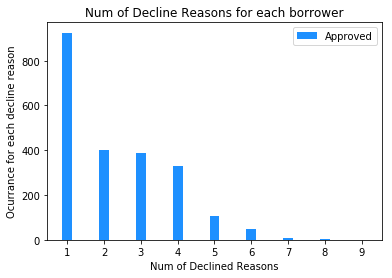

In [27]:
count = Declined['Num_decline_reason'].value_counts()

N = 9
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

plt.bar(ind, count, width, color='dodgerblue', label = "Approved")
plt.title('Num of Decline Reasons for each borrower')
plt.xticks(ind, ('1', '2', '3', '4', '5', '6', '7', '8', '9'))
plt.legend(loc='upper right')
plt.xlabel('Num of Declined Reasons')
plt.ylabel('Ocurrance for each decline reason')
plt.show()